In [1]:
local_path = './'

"""## Prepare fastai"""
from fastai import *
from fastai.text import *
from fastai.metrics import *
from fastai.callbacks.tensorboard import LearnerTensorboardWriter
from fastai.callbacks.misc import StopAfterNBatches
import datetime
from pytz import timezone

torch.cuda.set_device(1)

"""## Prepare Dataset"""
local_project_path = local_path + 'bp_deepred/'
if not os.path.exists(local_project_path):
    os.makedirs(local_project_path)
print('local_project_path:', local_project_path)

"""## Create Language Model"""
class dna_tokenizer(BaseTokenizer):
    def tokenizer(self, t):
        res = []
        tokens = t.split(' ')
        if len(tokens) == 3:
            bos = tokens[0]
            text = tokens[1]
            eos = tokens[2]
            res = list(text)
            res.insert(0, bos)
            res.append(eos)
        else:
            res = list(tokens)
        return res
tokenizer = Tokenizer(tok_func=dna_tokenizer, pre_rules=[], post_rules=[], special_cases=[])

local_project_path: ./bp_deepred/


In [2]:
# batch size
bs = 256
data_lm = TextLMDataBunch.from_csv(local_project_path, 'combined.csv',
                                   text_cols ='seq', valid_pct= 0.1, tokenizer=tokenizer,
                                   include_bos= True, include_eos=True, bs=bs)
print('data_cls Training set size', len(data_lm.train_ds))
print('data_cls Validation set size', len(data_lm.valid_ds))

data_cls Training set size 129303
data_cls Validation set size 14368


In [ ]:
data_lm.train_ds.x[10400]

In [ ]:
data_lm.show_batch()

In [ ]:
data_lm.vocab.itos

In [3]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.05, pretrained=False, metrics =[accuracy]).to_fp16()

In [14]:
learn_lm.data = data_lm

In [11]:
learn_lm.data.batch_size = 256

In [4]:
def add_tensorboard_callback(learn_lm):
    now = datetime.datetime.now().astimezone(timezone('US/Eastern'))
    time_for_different_run = f'{now.year}-{now.month}-{now.day}-{now.hour}-{now.minute}-{now.second}'

    proj_id = 'cafa' + time_for_different_run
    tboard_path = Path('log/' + proj_id)
    remove_tensorboard_callback(learn_lm)
    learn_lm.callback_fns.append(partial(LearnerTensorboardWriter, base_dir=tboard_path, name='CafaLearner'))

def remove_tensorboard_callback(learn_lm):
    if len(learn_lm.callback_fns) > 1: # not the best way to check this !!
        learn_lm.callback_fns.pop()


In [5]:
add_tensorboard_callback(learn_lm)

In [23]:
remove_tensorboard_callback(learn_lm)
learn_lm.lr_find()
add_tensorboard_callback(learn_lm)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.00E-05
Min loss divided by 10: 3.63E-06


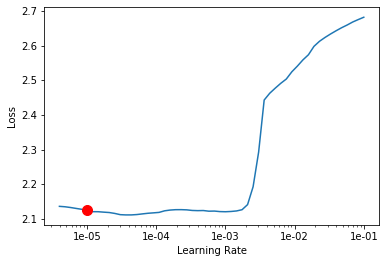

In [24]:
learn_lm.recorder.plot(skip_start=20, skip_end=20, suggestion = True)

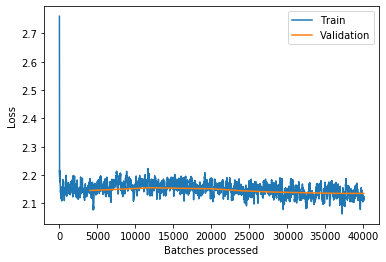

In [21]:
learn_lm.recorder.plot_losses()

In [ ]:
learn_lm.recorder.plot_lr(show_moms=True)

In [ ]:
learn_lm.recorder.plot_metrics()

In [27]:
learn_lm.fit_one_cycle(1, slice(1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.708568,2.702656,0.165962,18:49


In [47]:
learn_lm.unfreeze()

In [37]:
learn_lm.save('lm2-v2-loss2.57')

In [5]:
learn_lm.validate(metrics=[accuracy])

[1.9862074, tensor(0.3918)]

In [ ]:
learn_lm.summary()

In [ ]:
learn_lm.model

In [33]:
learn_lm.fit_one_cycle(3, slice(1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.675824,2.681247,0.173536,18:40
1,2.600143,2.606814,0.196926,18:53
2,2.554635,2.570283,0.208333,18:42


In [48]:
learn_lm.fit_one_cycle(1, slice(1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.527830,2.542972,0.217295,18:43


In [49]:
learn_lm.fit_one_cycle(3, slice(1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.535802,2.561162,0.212092,18:53
1,2.489463,2.493320,0.233346,18:53
2,2.423061,2.452071,0.246441,18:54


In [57]:
learn_lm.save('lm2-v2-loss2.36')

In [9]:
learn_lm.fit_one_cycle(1, slice(2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.055462,2.027883,0.379455,18:46


In [ ]:
learn_lm.fit_one_cycle(3, slice(1e-3), moms=(0.8,0.7))

In [65]:
learn_lm.save('lm2-v2-1')

In [ ]:
learn_lm.fit_one_cycle(10, slice(1e-3), moms=(0.8,0.7))

In [ ]:
learn_lm.save('lm2-v2-2')

In [ ]:
learn_lm.fit_one_cycle(10, slice(1e-3), moms=(0.8,0.7))

In [ ]:
learn_lm.save('lm2-v2-3')

In [ ]:
learn_lm.fit_one_cycle(10, slice(1e-3), moms=(0.8,0.7))

In [ ]:
learn_lm.save('lm2-v2-4')

In [ ]:
learn_lm.fit_one_cycle(10, slice(5e-4), moms=(0.8,0.7))

In [ ]:
learn_lm.load('lm2-v2-5');

In [ ]:
learn_lm.fit_one_cycle(10, slice(1e-3), moms=(0.8,0.7))

In [ ]:
learn_lm.save('lm2-v2-6')

In [ ]:
learn_lm.fit_one_cycle(10, slice(1e-3), moms=(0.8,0.7))

In [ ]:
learn_lm.save('lm2-v2-7')

In [ ]:
learn_lm.fit_one_cycle(10, slice(1e-3), moms=(0.8,0.7))

In [ ]:
learn_lm.save('lm2-v2-8')

In [ ]:
learn_lm.fit_one_cycle(20, slice(1e-3), moms=(0.8,0.7))

In [7]:
learn_lm.load('lm2-v2-8-2');

In [ ]:
learn_lm.fit_one_cycle(10, slice(8e-4), moms=(0.8,0.7))

In [ ]:
learn_lm.save('lm2-v2-9')

In [ ]:
learn_lm.fit_one_cycle(10, slice(6e-4), moms=(0.8,0.7))

In [ ]:
learn_lm.save('lm2-v2-10')

In [ ]:
learn_lm.fit_one_cycle(10, slice(4e-4), moms=(0.8,0.7))

In [ ]:
learn_lm.save('lm2-v2-11')

In [ ]:
learn_lm.fit_one_cycle(10, slice(2e-4), moms=(0.8,0.7))

In [8]:
learn_lm.load('lm2-v2-12-2');

In [13]:
learn_lm.fit_one_cycle(10, slice(1e-4), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.066458,2.025900,0.380170,18:46
1,2.099888,2.024779,0.380388,18:53
2,2.066996,2.023335,0.380802,18:49
3,2.069289,2.022646,0.380872,18:53
4,2.042596,2.021732,0.381088,18:45
5,2.045347,2.021696,0.381211,18:53
6,2.080825,2.021622,0.381184,18:43
7,2.050763,2.021988,0.381103,18:53
8,2.075285,2.022032,0.381052,18:55
9,2.070731,2.022088,0.380987,18:50


In [14]:
learn_lm.save('lm2-v2-13-2');

In [15]:
learn_lm.fit_one_cycle(10, slice(8e-5), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.069077,2.020635,0.381508,18:56
1,2.096281,2.020909,0.381359,18:46
2,2.064462,2.021975,0.380991,18:55
3,2.044330,2.021093,0.381343,18:45
4,2.106454,2.022587,0.380896,18:53
5,2.055004,2.020731,0.381407,18:56
6,2.063009,2.020526,0.381460,18:50
7,2.053851,2.020353,0.381516,18:53
8,2.068114,2.020188,0.381590,18:43
9,2.078215,2.021513,0.381202,18:53


In [16]:
learn_lm.save('lm2-v2-14')

In [17]:
learn_lm.fit_one_cycle(10, slice(6e-5), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.072428,2.019861,0.381719,18:45
1,2.055131,2.020473,0.381528,18:57
2,2.085179,2.021975,0.381091,18:58
3,2.088884,2.021374,0.381166,18:51
4,2.091002,2.021815,0.381058,18:55
5,2.055089,2.021579,0.381131,18:45
6,2.051543,2.020315,0.381540,18:55
7,2.058921,2.021773,0.381128,18:50
8,2.080103,2.020113,0.381566,19:03
9,2.092545,2.020097,0.381549,18:57


In [18]:
learn_lm.save('lm2-v2-15')

In [19]:
learn_lm.fit_one_cycle(10, slice(4e-5), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.031030,2.019860,0.381697,18:53
1,2.026770,2.020868,0.381389,18:57
2,2.078602,2.021752,0.381040,18:46
3,2.056434,2.020292,0.381552,18:56
4,2.038183,2.021297,0.381175,18:45
5,2.068243,2.021091,0.381273,18:56
6,2.027204,2.020329,0.381492,18:59
7,2.067380,2.021505,0.381149,18:52
8,2.051120,2.021258,0.381227,18:55
9,2.090459,2.020008,0.381587,18:44


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
learn_lm.save('lm2-v2-16')

In [21]:
learn_lm.fit_one_cycle(10, slice(2e-5), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.068888,2.019849,0.381666,18:58
1,2.071758,2.020405,0.381471,18:45
2,2.059923,2.021360,0.381194,18:55
3,2.065801,2.020227,0.381555,18:58
4,2.047962,2.020114,0.381517,18:53
5,2.068719,2.020250,0.381504,18:55
6,2.004986,2.020462,0.381524,18:44
7,2.063191,2.021524,0.381163,18:54
8,2.059245,2.020945,0.381284,18:43
9,2.062770,2.019731,0.381692,18:54


In [ ]:
learn_lm.load('lm2-v2-16');

In [11]:
learn_lm.fit_one_cycle(10, slice(2e-5), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.046956,1.998143,0.388607,18:32
1,2.054849,1.997650,0.388734,18:53
2,2.054493,1.998263,0.388438,18:53
3,2.043142,1.998188,0.388474,18:49
4,2.053067,1.998592,0.388456,18:43
5,2.036008,1.998739,0.388350,18:55
6,2.041655,1.998438,0.388415,18:54
7,2.050962,1.998389,0.388480,18:45
8,2.075465,1.998365,0.388444,18:56
9,2.039921,1.999172,0.388234,18:54


In [12]:
learn_lm.save('lm2-v2-18')

In [ ]:
learn_lm.fit_one_cycle(10, slice(2e-5), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.060993,1.999390,0.388204,18:52
1,2.045998,1.998537,0.388402,18:46
2,2.075999,1.999164,0.388305,18:55
3,2.042962,1.998979,0.388267,18:56
4,2.056369,1.999151,0.388207,18:46


In [ ]:
learn_lm.save('lm2-v2-19')

In [ ]:
learn_lm.fit_one_cycle(10, slice(2e-5), moms=(0.8,0.7))

In [ ]:
learn_lm.save('lm2-v2-20')

In [ ]:
learn_lm.fit_one_cycle(10, slice(2e-5), moms=(0.8,0.7))

In [4]:
learn_lm.load('lm2-v2-21');

In [6]:
learn_lm.save_encoder('lm2-v2-21_enc')

In [ ]:
learn_lm.summary()

In [ ]:
np.random.seed(0)